In [2]:
import networkx as nx
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 显示负号


In [3]:
# 可视化辅助函数
def draw(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.get_cmap('plasma'),
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    # plt.figure(figsize=(10,8))
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

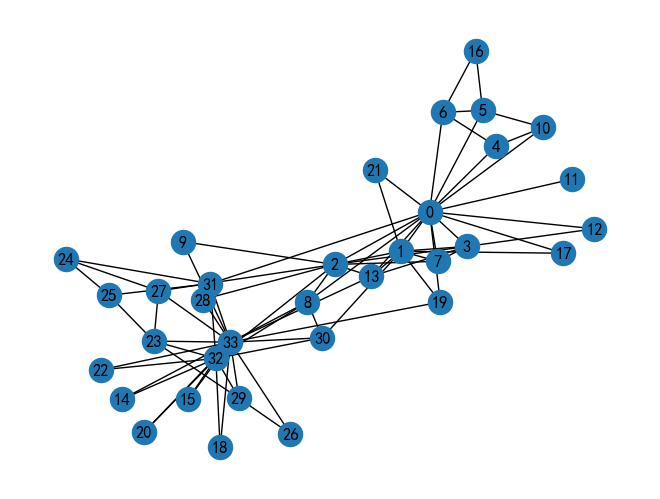

In [4]:
# 导入无向图
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=675)
nx.draw(G, pos, with_labels=True)

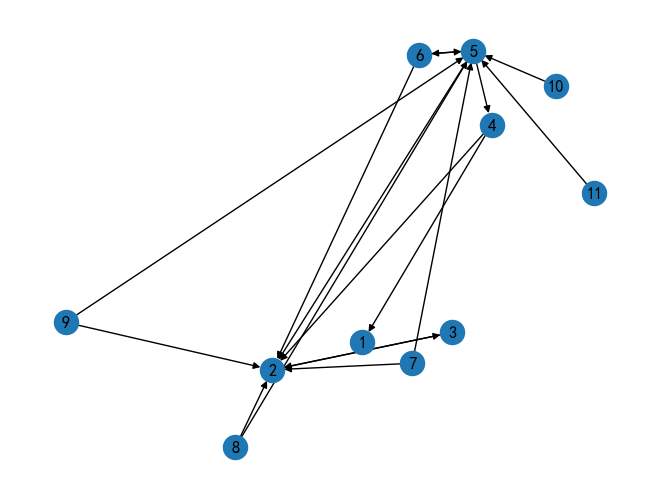

In [5]:
# 导入有向图
DiG = nx.DiGraph()
DiG.add_edges_from([(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4),
                    (5, 6), (6, 2), (6, 5), (7, 2), (7, 5), (8, 2),
                    (8, 5), (9, 2), (9, 5), (10, 5), (11, 5)])
# dpos = {1: [0.1, 0.9], 2: [0.4, 0.8], 3: [0.8, 0.9], 4: [0.15, 0.55],
#         5: [0.5,  0.5], 6: [0.8,  0.5], 7: [0.22, 0.3], 8: [0.30, 0.27],
#         9: [0.38, 0.24], 10: [0.7,  0.3], 11: [0.75, 0.35]}
nx.draw(DiG, pos, with_labels=True)
plt.show()

In [6]:
# Node Degree
print(list(nx.degree(G)))

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]


In [7]:
print(dict(G.degree()))


{0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17}


In [8]:
# 字典按值排序
print(sorted(dict(G.degree()).items(), key=lambda x: x[1], reverse=True))


[(33, 17), (0, 16), (32, 12), (2, 10), (1, 9), (3, 6), (31, 6), (8, 5), (13, 5), (23, 5), (5, 4), (6, 4), (7, 4), (27, 4), (29, 4), (30, 4), (4, 3), (10, 3), (19, 3), (24, 3), (25, 3), (28, 3), (9, 2), (12, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (20, 2), (21, 2), (22, 2), (26, 2), (11, 1)]


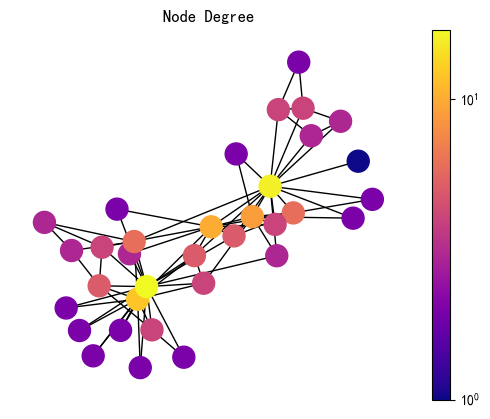

In [9]:
draw(G, pos, dict(G.degree()), 'Node Degree')

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


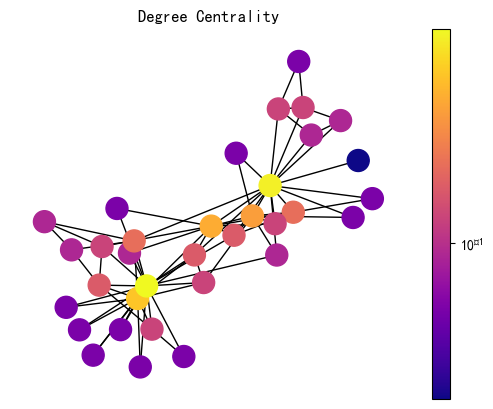

In [10]:
# Degree Centrality-无向图
nx.degree_centrality(G)
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


{2: 0.7000000000000001, 3: 0.1, 4: 0.1, 1: 0.1, 5: 0.6000000000000001, 6: 0.1, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0}
{2: 0.1, 3: 0.1, 4: 0.2, 1: 0.0, 5: 0.30000000000000004, 6: 0.2, 7: 0.2, 8: 0.2, 9: 0.2, 10: 0.1, 11: 0.1}


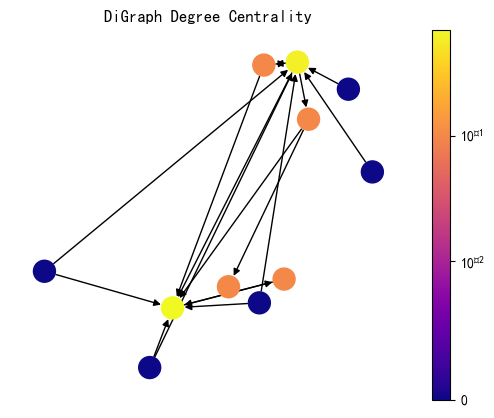

In [11]:
# Degree Centrality-有向图
print(nx.in_degree_centrality(DiG))
print(nx.out_degree_centrality(DiG))
draw(DiG, pos, nx.in_degree_centrality(DiG), 'DiGraph Degree Centrality')

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


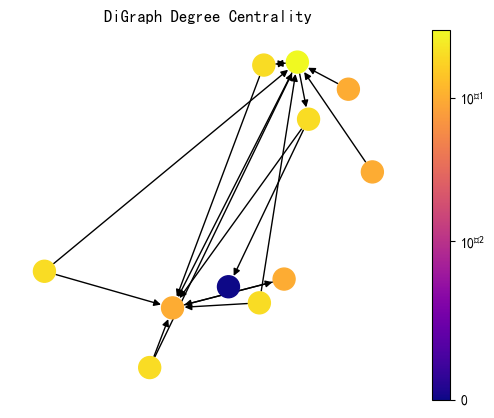

In [12]:
draw(DiG, pos, nx.out_degree_centrality(DiG), 'DiGraph Degree Centrality')

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


{0: 0.3554834941851943, 1: 0.2659538704545025, 2: 0.3171893899684447, 3: 0.21117407832057059, 4: 0.0759664588165738, 5: 0.07948057788594245, 6: 0.07948057788594245, 7: 0.17095511498035434, 8: 0.2274050914716605, 9: 0.10267519030637756, 10: 0.0759664588165738, 11: 0.052854169452336466, 12: 0.08425192086558085, 13: 0.22646969838808145, 14: 0.10140627846270832, 15: 0.10140627846270832, 16: 0.02363479426059687, 17: 0.09239675666845952, 18: 0.10140627846270832, 19: 0.14791134007618664, 20: 0.10140627846270832, 21: 0.09239675666845952, 22: 0.10140627846270832, 23: 0.15012328691726784, 24: 0.05705373563802805, 25: 0.059208202502790096, 26: 0.07558192219009324, 27: 0.13347932684333305, 28: 0.13107925627221215, 29: 0.13496528673866567, 30: 0.17476027834493085, 31: 0.191036269797917, 32: 0.30865104773369595, 33: 0.373371213013235}


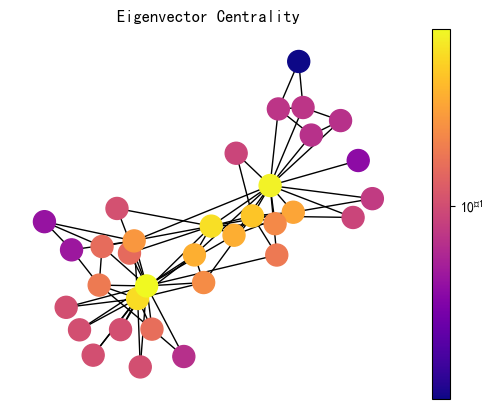

In [13]:
# Eigenvector Centrality-无向图（特征向量重要度）
print(nx.eigenvector_centrality(G))
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


{2: 0.7071067871666155, 3: 0.7071067752064792, 4: 7.973423921114883e-09, 1: 7.973424032137185e-09, 5: 7.973423712948066e-09, 6: 7.973423865603732e-09, 7: -0.0, 8: -0.0, 9: 2.77555756156289e-17, 10: -0.0, 11: 5.55111512312578e-17}


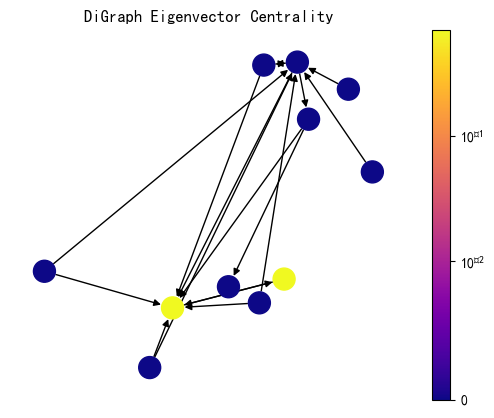

In [14]:
# Eigenvector Centrality-有向图（特征向量重要度）
print(nx.eigenvector_centrality_numpy(DiG))
draw(DiG, pos, nx.eigenvector_centrality_numpy(DiG), 'DiGraph Eigenvector Centrality')

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


{0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976909, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.30407497594997596}


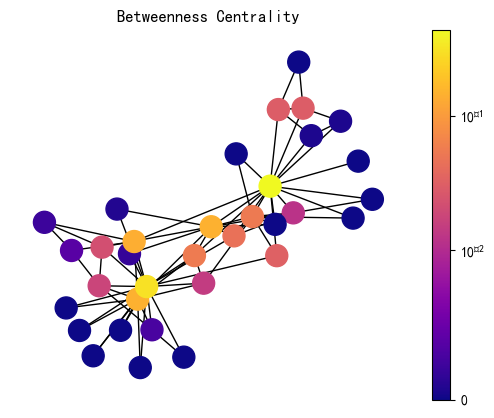

In [15]:
# Betweenness Centrality（判断一个节点是否处于咽喉、必经之地）
print(nx.betweenness_centrality(G))
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

{0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0.38372093023255816, 6: 0.38372093023255816, 7: 0.44, 8: 0.515625, 9: 0.4342105263157895, 10: 0.3793103448275862, 11: 0.36666666666666664, 12: 0.3707865168539326, 13: 0.515625, 14: 0.3707865168539326, 15: 0.3707865168539326, 16: 0.28448275862068967, 17: 0.375, 18: 0.3707865168539326, 19: 0.5, 20: 0.3707865168539326, 21: 0.375, 22: 0.3707865168539326, 23: 0.39285714285714285, 24: 0.375, 25: 0.375, 26: 0.3626373626373626, 27: 0.4583333333333333, 28: 0.4520547945205479, 29: 0.38372093023255816, 30: 0.4583333333333333, 31: 0.5409836065573771, 32: 0.515625, 33: 0.55}


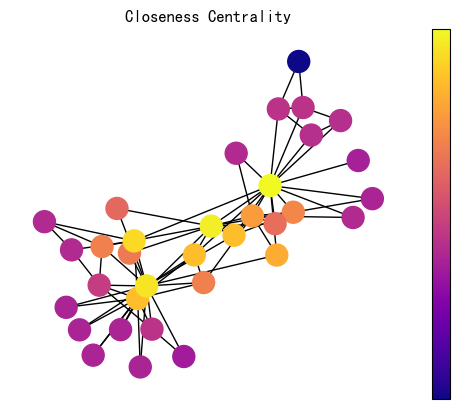

In [16]:
# Closeness Centrality（衡量一个节点去哪儿都近）
print(nx.closeness_centrality(G))
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


{2: 0.38439863456604384, 3: 0.3429125997558898, 4: 0.039087092099966095, 1: 0.03278149315934399, 5: 0.08088569323449774, 6: 0.039087092099966095, 7: 0.016169479016858404, 8: 0.016169479016858404, 9: 0.016169479016858404, 10: 0.016169479016858404, 11: 0.016169479016858404}


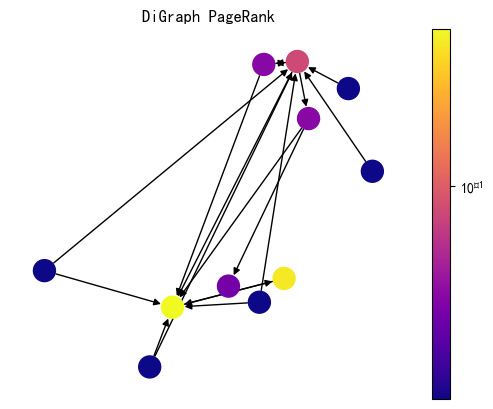

In [17]:
# PageRank
print(nx.pagerank(DiG, alpha=0.85))
draw(DiG, pos, nx.pagerank(DiG, alpha=0.85), 'DiGraph PageRank')

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


{0: 0.32132459695923254, 1: 0.23548425319449465, 2: 0.26576588481542884, 3: 0.19491320249172545, 4: 0.12190440564948415, 5: 0.13097227932864922, 6: 0.13097227932864922, 7: 0.16623305202689406, 8: 0.20071781096610813, 9: 0.12420150029869699, 10: 0.12190440564948415, 11: 0.09661674181730144, 12: 0.11610805572826274, 13: 0.19937368057318852, 14: 0.12513342642033798, 15: 0.12513342642033798, 16: 0.09067874388549632, 17: 0.12016515915440101, 18: 0.12513342642033798, 19: 0.15330578770069545, 20: 0.12513342642033798, 21: 0.12016515915440101, 22: 0.12513342642033798, 23: 0.1667906480987158, 24: 0.11021106930146939, 25: 0.11156461274962844, 26: 0.11293552094158045, 27: 0.15190166582081863, 28: 0.14358165473533302, 29: 0.1531060365504152, 30: 0.16875361802889588, 31: 0.1938016017020055, 32: 0.27508514346623925, 33: 0.33140639752189366}


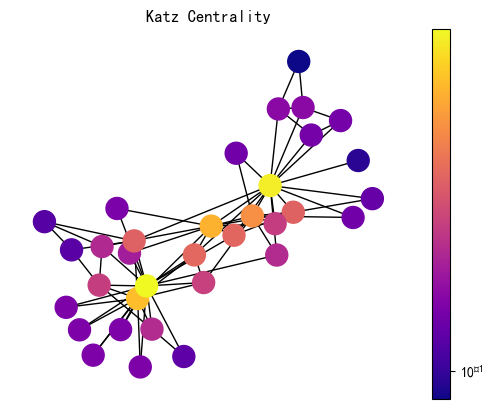

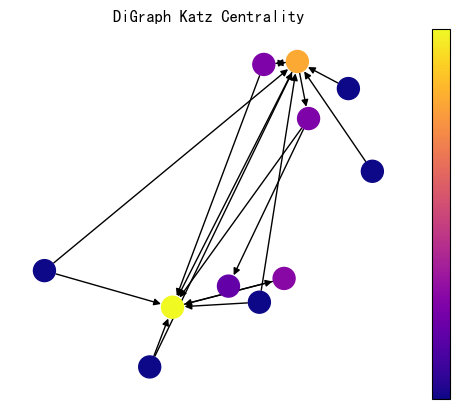

In [18]:
# Katz Centrality
print(nx.katz_centrality(G, alpha=0.1, beta=1.0))
draw(G, pos, nx.katz_centrality(G, alpha=0.1, beta=1.0), 'Katz Centrality')
draw(DiG, pos, nx.katz_centrality(DiG, alpha=0.1, beta=1.0), 'DiGraph Katz Centrality')

d:\AKProgram\Python\Anaconda\Anaconda\envs\py39pytorch\lib\site-packages\networkx\algorithms\link_analysis\hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212

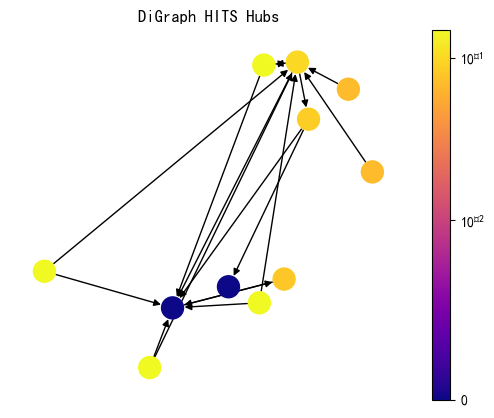

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


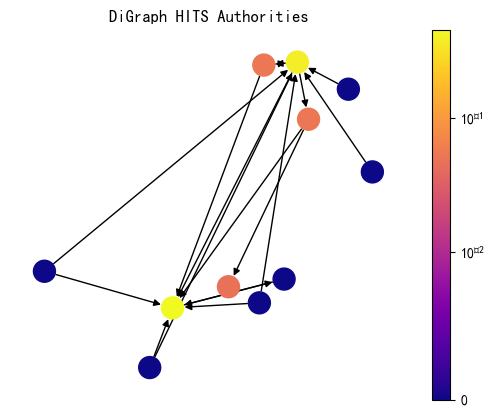

In [19]:
# HITS Hubs and Authorities
h, a = nx.hits(DiG)
draw(DiG, pos, h, 'DiGraph HITS Hubs')
draw(DiG, pos, a, 'DiGraph HITS Authorities')

None


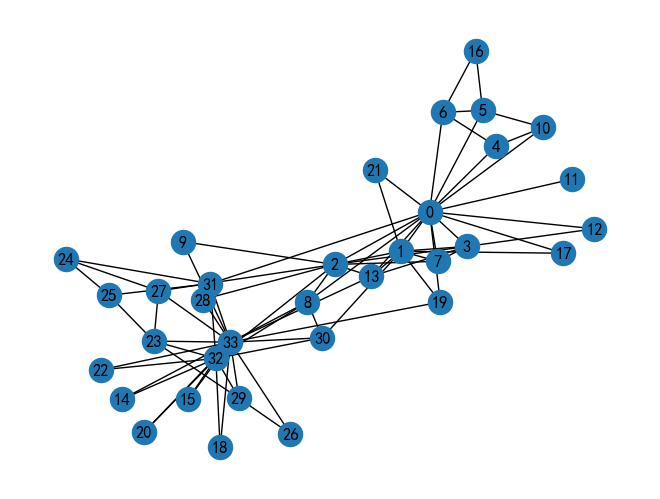

In [20]:
# NetworkX文档：社群属性 Clustering
print(nx.draw(G, pos, with_labels=True))

In [22]:
# 三角形个数
print(nx.triangles(G))

{0: 18, 1: 12, 2: 11, 3: 10, 4: 2, 5: 3, 6: 3, 7: 6, 8: 5, 9: 0, 10: 2, 11: 0, 12: 1, 13: 6, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 4, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 4, 30: 3, 31: 3, 32: 13, 33: 15}


In [23]:
print(nx.triangles(G, 0))

18


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


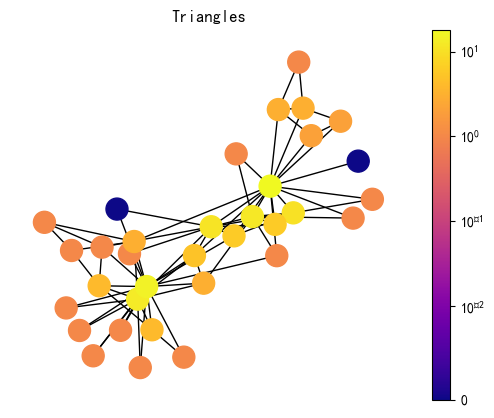

In [24]:
draw(G, pos, nx.triangles(G), 'Triangles')

In [25]:
# Clustering Coefficient
print(nx.clustering(G))

{0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}


In [26]:
print(nx.clustering(G, 0))

0.15


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


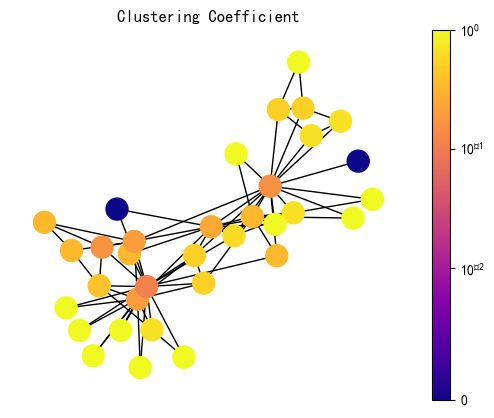

In [27]:
draw(G, pos, nx.clustering(G), 'Clustering Coefficient')

[(0, 11)]


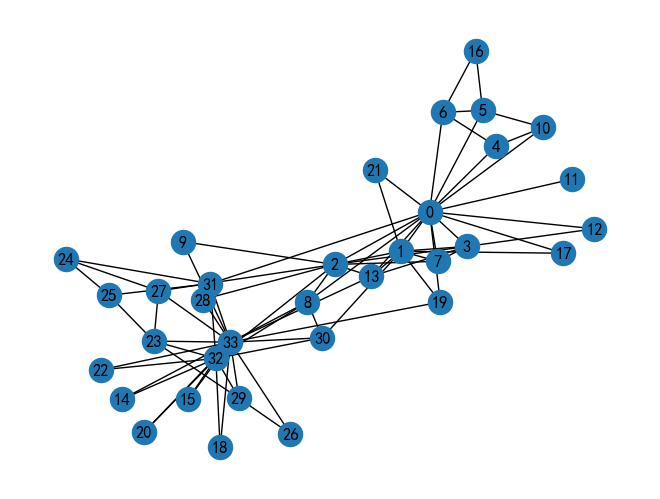

In [28]:
# Bridges
# 如果某个连接断掉，会使连通域个数增加，则该连接是bridge。
# bridge连接不属于环的一部分。
pos = nx.spring_layout(G, seed=675)
nx.draw(G, pos, with_labels=True)
print(list(nx.bridges(G)))

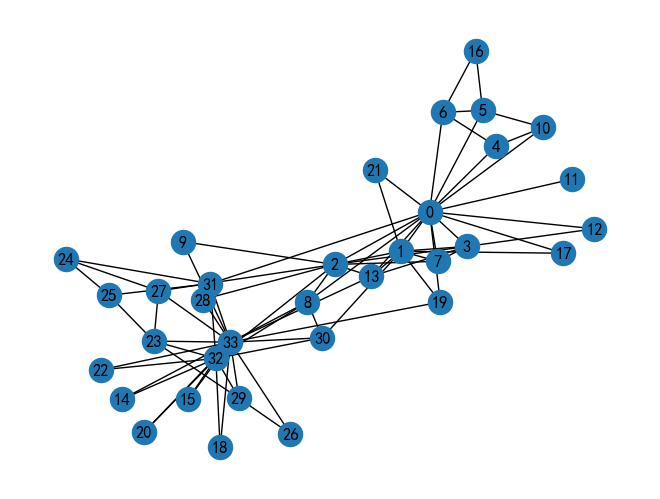

In [29]:
# Common Neighbors 和 Jaccard Coefficient
pos = nx.spring_layout(G, seed=675)
nx.draw(G, pos, with_labels=True)

In [30]:
print(sorted(nx.common_neighbors(G, 0, 4)))
preds = nx.jaccard_coefficient(G, [(0, 1), (2, 3)])
for u, v, p in preds:
    print(f"({u}, {v}) -> {p:.8f}")


[6, 10]
(0, 1) -> 0.38888889
(2, 3) -> 0.33333333


In [31]:
for u, v, p in nx.adamic_adar_index(G, [(0, 1), (2, 3)]):
    print(f"({u}, {v}) -> {p:.8f}")

(0, 1) -> 6.13071687
(2, 3) -> 2.15847583


In [32]:
# Katz Index
# 节点u到节点v，路径为k的路径个数。
import numpy as np
from numpy.linalg import inv

G = nx.karate_club_graph()
print(len(G.nodes))

34


In [33]:
# 计算主特征向量
L = nx.normalized_laplacian_matrix(G)
e = np.linalg.eigvals(L.A)
print('最大特征值', max(e))



最大特征值 1.692239186366747


<class 'networkx.utils.decorators.argmap'> compilation 63:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [34]:
# 折减系数
beta = 1 / max(e)
# 创建单位矩阵
I = np.identity(len(G.nodes))
# 计算 Katz Index
S = inv(I - nx.to_numpy_array(G) * beta) - I
print(S.shape)



(34, 34)
